In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy as sp
from IPython.display import display, Math, Latex

In [2]:
# %pip install ipympl 
%matplotlib widget 

In [19]:
R, rho, R_0, rho_0, A, B, d, n  = sym.symbols(r"\hat{R}_{a} \hat{\rho}_a \hat{R}_0 \rho_0 \hat{A} \hat{B} \hat{\delta}_R n", real=True)

# define system
F = sym.Matrix(
    [
        A*(1 - R)/(rho_0**n + rho**n) - d*R,
        B*(1 - rho)/(R_0**n + R**n) - rho,
    ]
)
print(sym.latex(F))

# display(Math(r"F = " + sym.latex(F)))
# # find fixed points
# fixed_points = sym.solve(F, (R, rho))
# for point in fixed_points:
#     display(Math(sym.latex(point)))


# find jacobian
J = F.jacobian((R, rho))
display(Math(r"Jac(F) = " + sym.latex(J)))

eigenvalues = J.eigenvals()
[l1, l2] = eigenvalues
for k, eigenvalue in enumerate(eigenvalues):
    display(Math(f"\lambda_{k} = " + sym.latex(eigenvalue)))

# eigenvectors = J.eigenvects()
# for eigenvector in eigenvectors:
#     display(Math(sym.latex(eigenvector)))



\left[\begin{matrix}- \delta_{R} \hat{R}_{a} + \frac{\hat{A} \left(1 - \hat{R}_{a}\right)}{\hat{\rho}_a^{n} + \rho_{0}^{n}}\\\frac{\hat{B} \left(1 - \hat{\rho}_a\right)}{\hat{R}_0^{n} + \hat{R}_{a}^{n}} - \hat{\rho}_a\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<string>:1: RuntimeWarning: invalid value encountered in divide


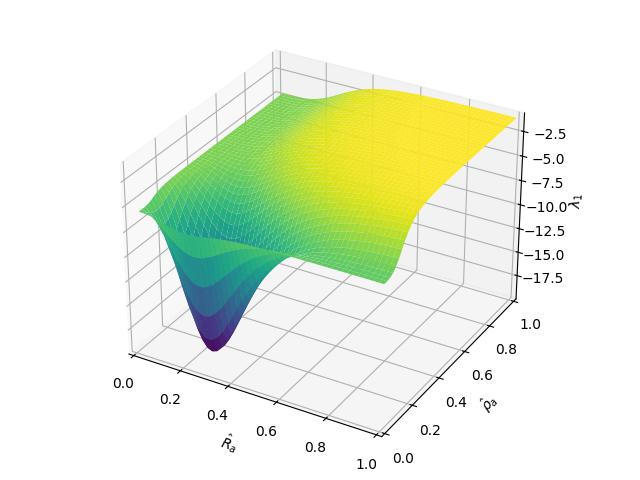

In [17]:
# substitute default values
defaut_values = {
    A: 0.003,
    B: 0.03,
    d: 1,
    n: 4,
    R_0: 0.3,
    rho_0: 0.16
}

sym.plotting.plot3d(l1.subs(defaut_values), (R, 0, 1), (rho, 0, 1), zlabel=r"$\lambda_1$")


<string>:1: RuntimeWarning: invalid value encountered in divide


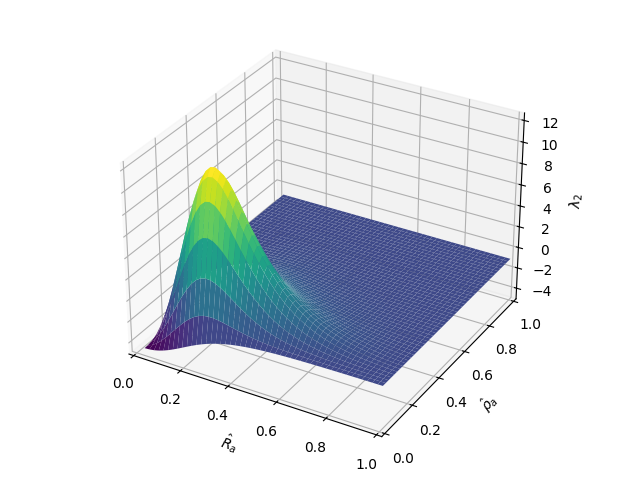

In [18]:
sym.plotting.plot3d(l2.subs(defaut_values), (R, 0, 1), (rho, 0, 1), zlabel=r"$\lambda_2$")